# 1. 데이터 불러오기

In [ ]:
! git clone https://github.com/LeeHuiJong/SkillTreePython-DataAnalysis

Cloning into 'SkillTreePython-DataAnalysis'...
remote: Enumerating objects: 970, done.
remote: Counting objects: 100% (305/305), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 970 (delta 179), reused 280 (delta 165), pack-reused 665
Receiving objects: 100% (970/970), 37.67 MiB | 22.22 MiB/s, done.
Resolving deltas: 100% (520/520), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/SkillTreePython-DataAnalysis/05.머신러닝기반데이터분석/data/여행상품 신청 여부/train.csv')
test = pd.read_csv('/content/SkillTreePython-DataAnalysis/05.머신러닝기반데이터분석/data/여행상품 신청 여부/test.csv')

# 2. 데이터 EDA

In [ ]:
# 우선 index 정보만 담고있는 id 컬럼을 삭제합니다.
train = train.drop(['id'], axis = 1)
test = test.drop(['id'], axis = 1)

In [ ]:
train.shape

(1955, 19)

In [ ]:
test.shape

(2933, 18)

In [ ]:
len(train.columns) # 피처의 개수 19개

19

In [ ]:
plt.figure(figsize = (6,6))
train_prod = train['ProdTaken'].value_counts()
colors = ['#ff9999','#8fd9b6']
_=plt.pie(train_prod, labels = train_prod.index, autopct='%.1f%%', colors = colors)
plt.title('Sign for package(0 = no, 1 = yes)', size = 17)
plt.show()

NameError: ignored

신청 안한 사람의 비율이 80%를 넘는군요 패키지 마케팅 효과가 좋은 영향을 주지는 않는것 같습니다.

In [ ]:
train.columns

Index(['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'ProdTaken'],
      dtype='object')

In [ ]:
# train 결측치
train_null = train.isnull().sum()[train.isnull().sum()>0]
train_null

Age                          94
TypeofContact                10
DurationOfPitch             102
NumberOfFollowups            13
PreferredPropertyStar        10
NumberOfTrips                57
NumberOfChildrenVisiting     27
MonthlyIncome               100
dtype: int64

In [ ]:
# test 결측치
test_null = test.isnull().sum()[test.isnull().sum()>0]
test_null

Age                         132
TypeofContact                15
DurationOfPitch             149
NumberOfFollowups            32
PreferredPropertyStar        16
NumberOfTrips                83
NumberOfChildrenVisiting     39
MonthlyIncome               133
dtype: int64

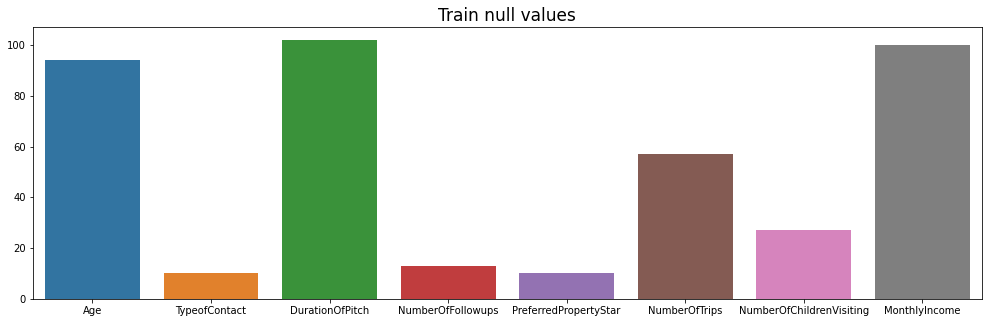

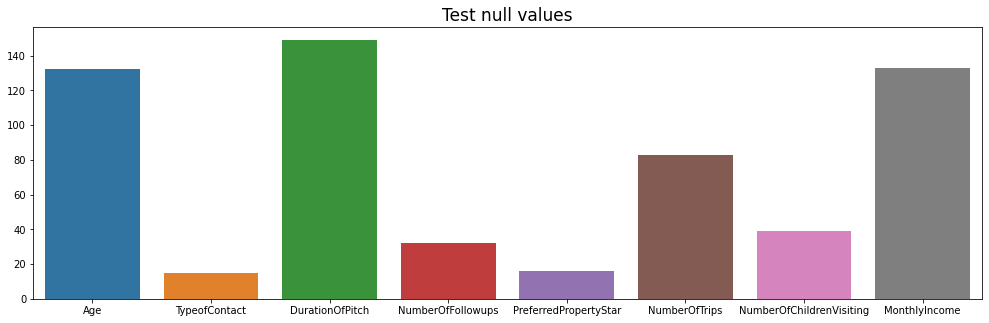

In [ ]:
# 결측치 막대그래프화
plt.figure(figsize = (17,5))
plt.title('Train null values', fontsize = 17)
_=sns.barplot(x = train_null.index, y = train_null)

plt.figure(figsize = (17,5))
plt.title('Test null values', fontsize = 17)
_=sns.barplot(x = test_null.index, y = test_null)

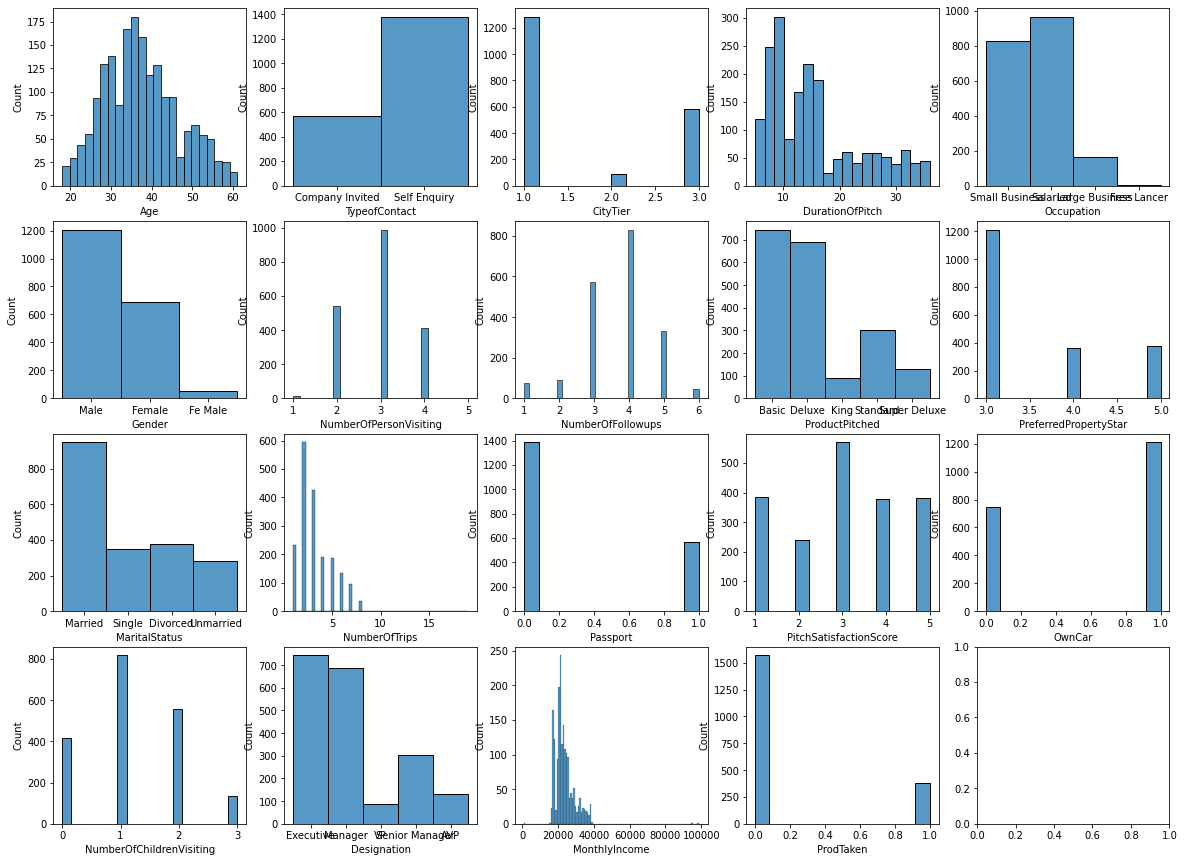

In [ ]:
# train 데이터 전체 분포도
f, axes = plt.subplots(4,5, figsize=(20,15))
axes = axes.flatten()
for col, ax in zip(train.columns, axes):
  sns.histplot(data = train, x=col, ax=ax)
plt.show()

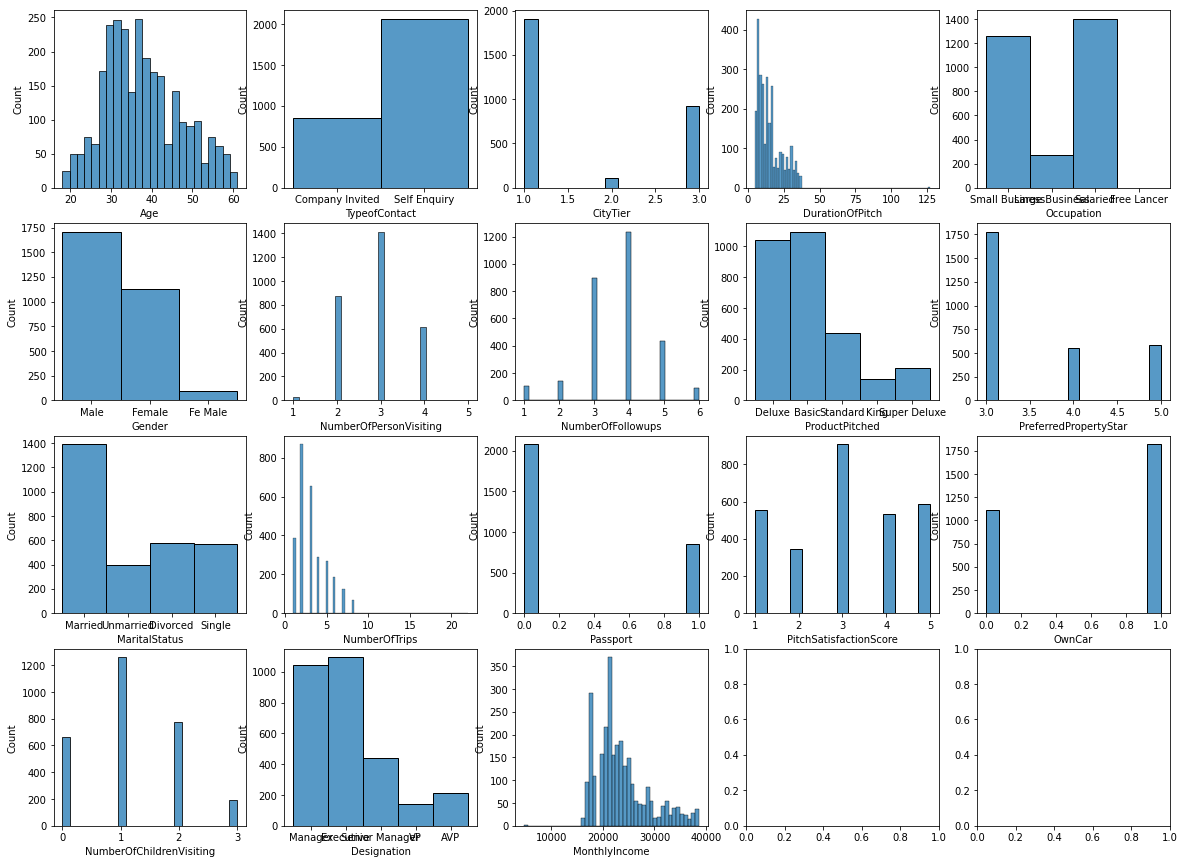

In [ ]:
# test 셋 분포도
f, axes = plt.subplots(4,5, figsize=(20,15))
axes = axes.flatten()
for col, ax in zip(test.columns, axes):
  sns.histplot(data = test, x=col, ax=ax)
plt.show()

In [ ]:
test.isnull().sum()

Age                         132
TypeofContact                15
CityTier                      0
DurationOfPitch             149
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            32
ProductPitched                0
PreferredPropertyStar        16
MaritalStatus                 0
NumberOfTrips                83
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     39
Designation                   0
MonthlyIncome               133
dtype: int64

In [ ]:
train.columns

Index(['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'ProdTaken'],
      dtype='object')

In [ ]:
train.NumberOfTrips.unique()

array([ 3.,  1.,  2.,  7.,  4.,  6.,  5.,  8., nan, 19.])

타겟 데이터 :
* ProdTaken

범주형 데이터 : 15개
* TypeofContact 
* CityTier
* Occupation 
* Gender
* ProductPitched 
* PreferredPropertyStar 
* MaritalStatus
* Passport
* PitchSatisfactionScore
* OwnCar
* Designation


연속형 데이터 : 3개
* Age
* DurationOfPitch
* MonthlyIncome
* NumberOfPersonVisiting
* NumberOfFollowups
* NumberOfChildrenVisiting
* NumberOfTrips

## 1.1 변수간 상관관계

In [ ]:
train.corr().style.background_gradient(cmap ='coolwarm')

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
Age,1.000000,0.007875,0.025779,0.010795,0.009834,-0.026789,0.178143,0.030162,0.032860,0.060298,0.039495,0.440733,-0.135832
CityTier,0.007875,1.000000,0.056010,0.018071,0.023532,-0.011882,-0.020887,0.013665,-0.028168,0.014177,0.025359,0.057705,0.085583
DurationOfPitch,0.025779,0.056010,1.000000,0.096268,0.039485,-0.004448,0.022236,0.043478,0.011926,-0.015087,0.047770,0.016011,0.072899
NumberOfPersonVisiting,0.010795,0.018071,0.096268,1.000000,0.333738,0.017057,0.214895,0.023638,-0.012981,0.018545,0.610193,0.168701,0.006483
NumberOfFollowups,0.009834,0.023532,0.039485,0.333738,1.000000,-0.049151,0.135183,-0.005332,-0.007195,0.051920,0.293942,0.194668,0.105038
PreferredPropertyStar,-0.026789,-0.011882,-0.004448,0.017057,-0.049151,1.000000,0.035064,0.014701,-0.019620,0.031355,0.027038,-0.024338,0.114923
NumberOfTrips,0.178143,-0.020887,0.022236,0.214895,0.135183,0.035064,1.000000,0.004418,0.034816,0.005982,0.189517,0.137093,0.044922
Passport,0.030162,0.013665,0.043478,0.023638,-0.005332,0.014701,0.004418,1.000000,0.018526,-0.045133,0.030512,0.017044,0.293726
PitchSatisfactionScore,0.032860,-0.028168,0.011926,-0.012981,-0.007195,-0.019620,0.034816,0.018526,1.000000,0.073097,0.023842,-0.005497,0.067736
OwnCar,0.060298,0.014177,-0.015087,0.018545,0.051920,0.031355,0.005982,-0.045133,0.073097,1.000000,0.036416,0.109662,-0.040465


In [ ]:
test.corr().style.background_gradient(cmap ='coolwarm')

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
id,1.000000,-0.036715,0.017256,-0.001939,-0.009575,0.024299,0.012639,-0.000101,-0.026456,-0.009618,0.007364,-0.002434,-0.010290
Age,-0.036715,1.000000,-0.031001,-0.035406,0.012626,-0.010490,-0.000354,0.189506,0.035474,0.009063,0.041137,-0.012490,0.482991
CityTier,0.017256,-0.031001,1.000000,0.002429,-0.013901,0.023861,-0.007648,-0.035160,-0.006004,-0.051562,-0.003022,-0.015060,0.047783
DurationOfPitch,-0.001939,-0.035406,0.002429,1.000000,0.046370,-0.009592,-0.007950,0.002171,0.026591,-0.012152,0.006771,0.021385,-0.021145
NumberOfPersonVisiting,-0.009575,0.012626,-0.013901,0.046370,1.000000,0.325116,0.045074,0.182700,0.003103,-0.023694,0.005111,0.610638,0.214075
NumberOfFollowups,0.024299,-0.010490,0.023861,-0.009592,0.325116,1.000000,-0.007376,0.142307,0.011867,0.011733,-0.014601,0.281153,0.163557
PreferredPropertyStar,0.012639,-0.000354,-0.007648,-0.007950,0.045074,-0.007376,1.000000,-0.002465,-0.008000,-0.024904,0.005401,0.042213,0.040667
NumberOfTrips,-0.000101,0.189506,-0.035160,0.002171,0.182700,0.142307,-0.002465,1.000000,0.018437,-0.029825,-0.023326,0.155164,0.141018
Passport,-0.026456,0.035474,-0.006004,0.026591,0.003103,0.011867,-0.008000,0.018437,1.000000,-0.007561,-0.007116,0.013352,-0.007858
PitchSatisfactionScore,-0.009618,0.009063,-0.051562,-0.012152,-0.023694,0.011733,-0.024904,-0.029825,-0.007561,1.000000,0.065981,-0.014308,0.056480


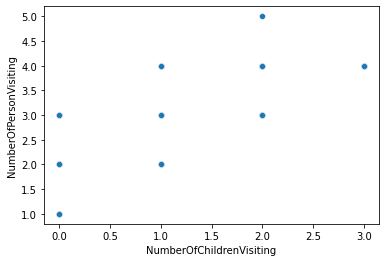

In [ ]:
sns.scatterplot(x = train['NumberOfChildrenVisiting'], y = train['NumberOfPersonVisiting'])

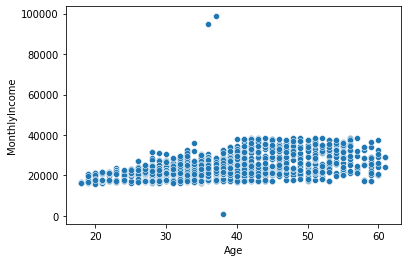

In [ ]:
sns.scatterplot(x = train['Age'], y = train['MonthlyIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


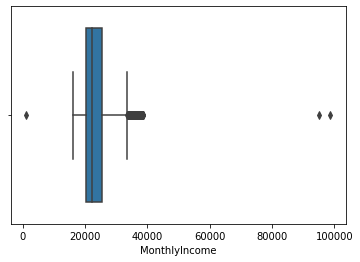

In [ ]:
sns.boxplot(train['MonthlyIncome'])

# 2. 결측치 처리

In [ ]:
# 결측치가 존재하는 피처만 뽑아보았다.
null = train.isnull().sum()
null[null>1]

Age                          94
TypeofContact                10
DurationOfPitch             102
NumberOfFollowups            13
PreferredPropertyStar        10
NumberOfTrips                57
NumberOfChildrenVisiting     27
MonthlyIncome               100
dtype: int64

 결측치를 가진 피처 : 8개
 1. 연속형
 * Age
 * MonthlyIncome
 * DurationOfPitch
 * NumberOfFollowups
 * NumberOfChildrenVisiting
 * NumberOfTrips

 <br>
 </br>
 2. 범주형
 * TypeofContact
 * PreferredPropertyStar


## 2.1 연속형 데이터 결측치 처리

### 2.1.1 MonthlyIncome

In [ ]:
train[train['MonthlyIncome']>80000].index

Int64Index([604, 1338], dtype='int64')

In [ ]:
train[train['MonthlyIncome']<5000].index

Int64Index([189], dtype='int64')

In [ ]:
# 이상치 삭제
train = train.drop(train[train['MonthlyIncome']>80000].index)

In [ ]:
train = train.drop(train[train['MonthlyIncome']<5000].index)

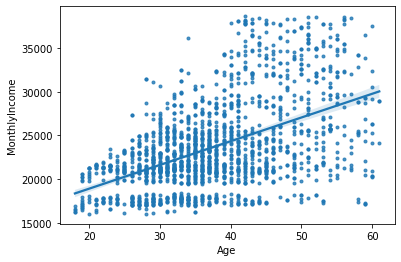

In [ ]:
# MonthlyIncom 과 Age 간에 상관관계가 별로 없는것으로 보인다.
sns.regplot(data = train, x=train['Age'], y=train['MonthlyIncome'], marker = '.')

In [ ]:
train['MonthlyIncome'].mean()

23557.25917926566

In [ ]:
train['MonthlyIncome'].median()

22295.0

In [ ]:
# 월급의 결측치를 중앙값으로 대체
train = train['MonthlyIncome'].fillna(train['MonthlyIncome'].median())

0       20384.000000
1       19599.000000
2       23557.259179
3       21274.000000
4       19907.000000
            ...     
1950    20723.000000
1951    31595.000000
1952    21651.000000
1953    22218.000000
1954    17853.000000
Name: MonthlyIncome, Length: 1952, dtype: float64

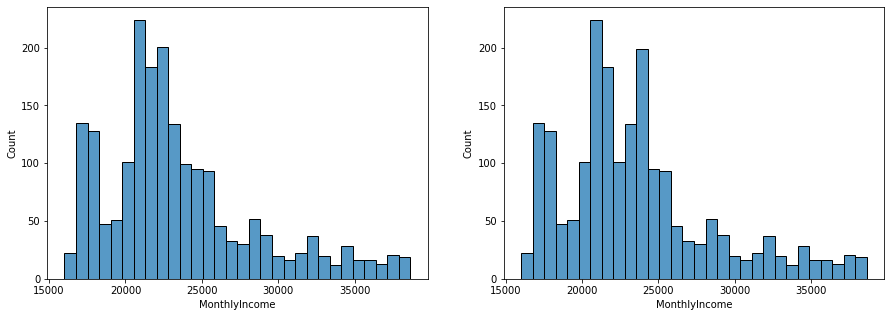

In [ ]:
# median이 조금 더 정규분포에 가까워지게 할수있기 때문에 median을 결측치를 채우는데 사용한다.
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(train['MonthlyIncome'].fillna(train['MonthlyIncome'].median()), ax=ax[0])
sns.histplot(train['MonthlyIncome'].fillna(train['MonthlyIncome'].mean()), ax=ax[1])

### 2.1.2 Age

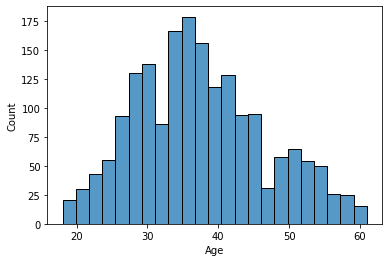

In [ ]:
sns.histplot(train['Age']) # 나이는 어느정도 정규분포에 가깝다

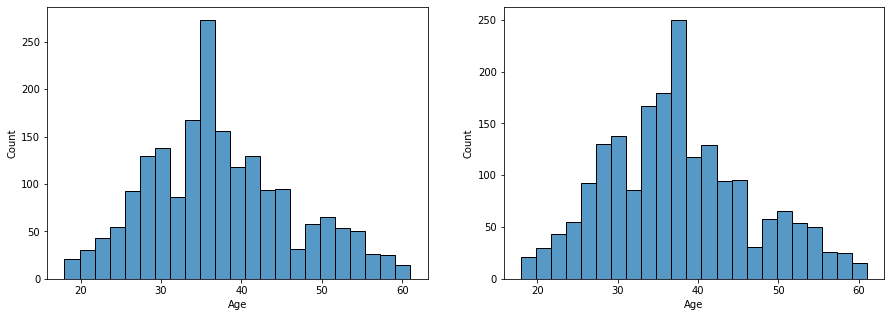

In [ ]:
# 결측치에 평균을 대입하는것이 좀더 정규분포에 가까워 보이기 때문에 평균으로 대체한다.
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(train['Age'].fillna(train['Age'].median()), ax=ax[0])
sns.histplot(train['Age'].fillna(train['Age'].mean()), ax=ax[1])

### 2.1.3 DurationOfPitch

In [ ]:
train['DurationOfPitch']

0       10.0
1        NaN
2        NaN
3        7.0
4        6.0
        ... 
1950    10.0
1951     8.0
1952    28.0
1953    30.0
1954     9.0
Name: DurationOfPitch, Length: 1955, dtype: float64

In [ ]:
train['DurationOfPitch'].isnull().sum() # 102개의 결측치

102

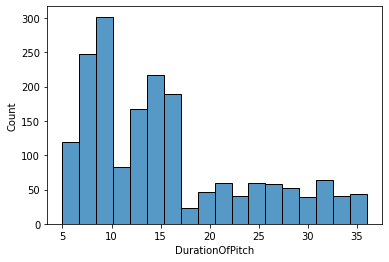

In [ ]:
sns.histplot(train['DurationOfPitch'])

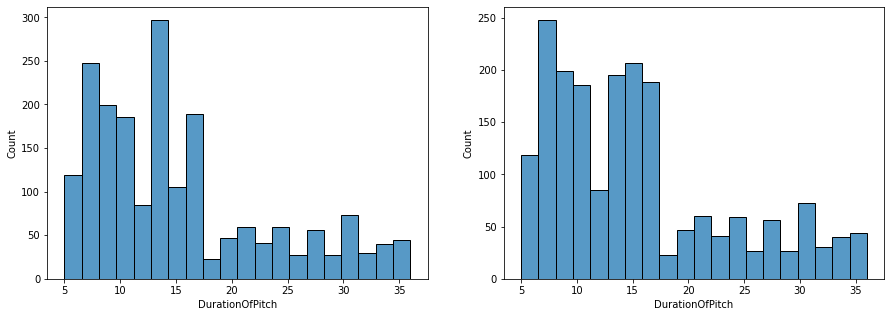

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(train['DurationOfPitch'].fillna(train['DurationOfPitch'].median()), ax=ax[0])
sns.histplot(train['DurationOfPitch'].fillna(train['DurationOfPitch'].mean()), ax=ax[1]) 
# 결측치 median 으로 처리

## 2.2 범주형 데이터 처리

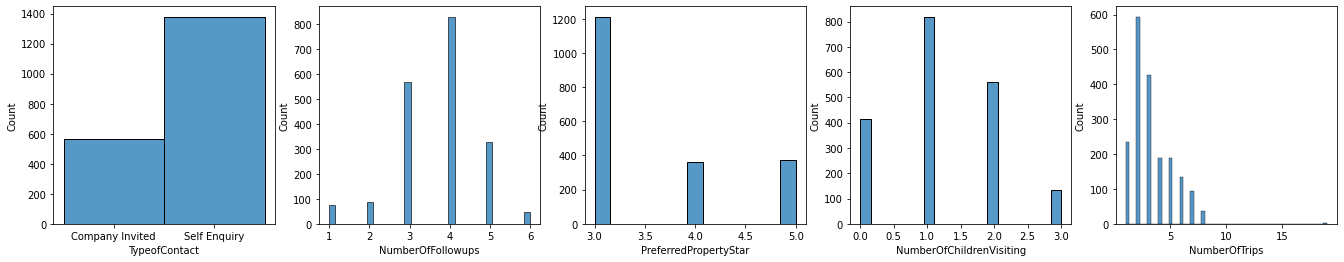

In [ ]:
cat_null = ['TypeofContact', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfChildrenVisiting', 'NumberOfTrips']
f, axes = plt.subplots(1,5, figsize=(23,4))
axes = axes.flatten()
for col, ax in zip(train[cat_null], axes):
  sns.histplot(data = train, x=col, ax=ax)
plt.show()

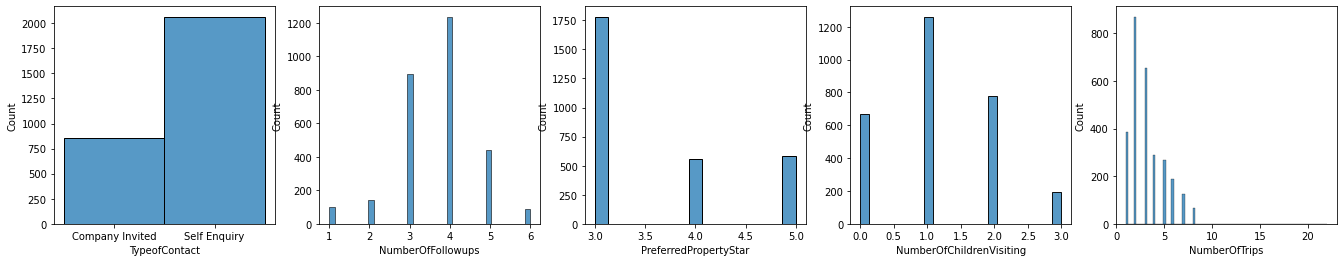

In [ ]:
cat_null = ['TypeofContact', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfChildrenVisiting', 'NumberOfTrips']
f, axes = plt.subplots(1,5, figsize=(23,4))
axes = axes.flatten()
for col, ax in zip(test[cat_null], axes):
  sns.histplot(data = test, x=col, ax=ax)
plt.show()

train, test 둘다 하나의 피처(NumberOfTrips)를 제외하고 같은 unique 값을 공유하기 때문에 최빈값으로 대체해도 괜찮음

In [ ]:
# NumberOfTrips만 따로 처리를 해줄지 확인
print(f'train의 값:', sorted(train['NumberOfTrips'].unique()))
print(f'test의 값:', sorted(test['NumberOfTrips'].unique()))

train의 값: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, nan, 19.0]
test의 값: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, nan, 8.0, 20.0, 21.0, 22.0]


In [ ]:
train[train['NumberOfTrips'] == 19]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
987,988,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0,1


In [ ]:
test[test['NumberOfTrips'] == 20]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2059,2060,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0


In [ ]:
test[test['NumberOfTrips'] == 21]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1771,1772,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0


In [ ]:
test[test['NumberOfTrips'] == 22]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1757,1758,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0


In [ ]:
train[train['NumberOfTrips'] == 19]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
987,988,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0,1


train 에 없는 값 : 20, 21, 22<br>
test 에 없는 값 : 19

- 매우 작은 데이터 값이기 때문에 드롭해도 문제없다 판단됨

In [ ]:
test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,2,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,3,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3,4,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4,5,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,Self Enquiry,1,6.0,Small Business,Female,2,3.0,Super Deluxe,3.0,Single,7.0,0,4,1,1.0,AVP,32328.0
2929,2930,33.0,Self Enquiry,1,9.0,Small Business,Fe Male,4,2.0,Deluxe,3.0,Unmarried,2.0,0,3,0,1.0,Manager,23733.0
2930,2931,33.0,Company Invited,1,31.0,Salaried,Male,4,4.0,Deluxe,3.0,Divorced,3.0,0,4,1,1.0,Manager,23987.0
2931,2932,26.0,Self Enquiry,1,9.0,Small Business,Male,4,2.0,Basic,5.0,Unmarried,2.0,0,2,1,3.0,Executive,22102.0
